In [1]:
import MyTorch
from MyTorch.nn import Sequential, Conv2d, Tanh, Linear, Sigmoid, Flatten, CrossEntropyLoss
from MyTorch.optim import SGD
from MyTorch import Tensor

In [2]:
from torchvision import datasets, transforms
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)
train_set_array = train_set.data.numpy()[:1000]
test_set_array = test_set.data.numpy()[:1000]

In [3]:
import numpy as np
np.random.seed(1)

x_train = train_set.data.numpy()[:1000] / 255
x_test = test_set.data.numpy()[:1000] / 255
y_train = train_set.targets.numpy()[:1000] 
y_test = test_set.targets.numpy()[:1000]


In [4]:
x_train = Tensor(x_train, autograd=True)[:, None, :, :]
x_test = Tensor(x_test, autograd=True)[:, None, :, :]
y_train = Tensor(y_train, autograd=True)
y_test = Tensor(y_test, autograd=True)

In [5]:
iterations = 50
alpha = 0.001
batch_size = 128

In [6]:
model = Sequential(
    [
        Conv2d(image_size=(28,28), in_channels=1, out_channels=16, kernel_size=(3, 3), stride=2),
        Tanh(),
        Flatten(), 
        Linear(2704, 10)
    ]
)

In [7]:
criterion = CrossEntropyLoss()
optim = SGD(parameters=model.get_parameters(), alpha=alpha)

In [8]:
for i in range(iterations):
    train_all_count = x_train.shape[0]
    train_correct_count = 0
    
    # Train loop for batches
    for batch_start in range(0, x_train.shape[0], batch_size):
        
        data = x_train[batch_start: batch_start + batch_size]
        target = y_train[batch_start: batch_start + batch_size]
        
        pred = model.forward(data)
        loss = criterion.forward(pred, target)
        
        loss.backward()
        optim.step()
#         print(loss)
        train_correct_count += (pred.softmax().argmax(axis=1) == target.data).sum()
    
    train_accuracy = train_correct_count / train_all_count

    # Find test accuracy
    test_pred = model.forward(x_test)
    test_correct_count = (test_pred.softmax().argmax(axis=1) == y_test.data).sum()
    test_accuracy = test_correct_count / x_test.shape[0]

    print('I:{} Train accuracy: {} Test accuracy: {}'.format(i, train_accuracy, test_accuracy))

I:0 Train accuracy: 0.154 Test accuracy: 0.243
I:1 Train accuracy: 0.468 Test accuracy: 0.533
I:2 Train accuracy: 0.705 Test accuracy: 0.659
I:3 Train accuracy: 0.79 Test accuracy: 0.723
I:4 Train accuracy: 0.827 Test accuracy: 0.752
I:5 Train accuracy: 0.844 Test accuracy: 0.771
I:6 Train accuracy: 0.857 Test accuracy: 0.784
I:7 Train accuracy: 0.872 Test accuracy: 0.796
I:8 Train accuracy: 0.88 Test accuracy: 0.804
I:9 Train accuracy: 0.887 Test accuracy: 0.814
I:10 Train accuracy: 0.896 Test accuracy: 0.818
I:11 Train accuracy: 0.896 Test accuracy: 0.823
I:12 Train accuracy: 0.9 Test accuracy: 0.823
I:13 Train accuracy: 0.904 Test accuracy: 0.824
I:14 Train accuracy: 0.908 Test accuracy: 0.826
I:15 Train accuracy: 0.91 Test accuracy: 0.829
I:16 Train accuracy: 0.911 Test accuracy: 0.827
I:17 Train accuracy: 0.914 Test accuracy: 0.829
I:18 Train accuracy: 0.916 Test accuracy: 0.832
I:19 Train accuracy: 0.921 Test accuracy: 0.833
I:20 Train accuracy: 0.923 Test accuracy: 0.836
I:21 Tr

In [10]:
import matplotlib.pyplot as plt

Prediction: 6


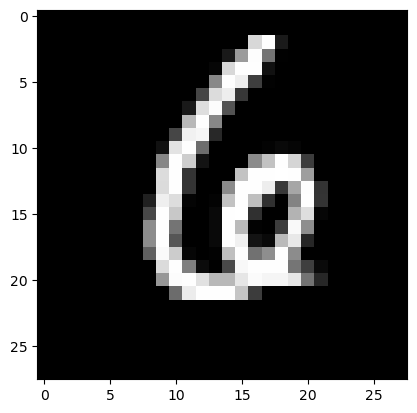

In [14]:
input_example = x_test[123:124]
pred = model.forward(input_example)
print("Prediction:",  pred.softmax().argmax(axis=1)[0])

plt.imshow(input_example[0][0].data, cmap='gray')
plt.show()